# Batch Correction - Two-Phase Execution

- **Phase 1**: Data generation (calls `glycoforge/pipeline.py` to simulate data)
- **Phase 2**: Correction & evaluation


# Example 1: ComBat correction based on simplified-simulated data
Steps:

1. Define Dirichlet parameters directly (uniform alpha_H, heterogeneous alpha_U scaling)
2. Generate clean simulated data with biological ground truth
3. Apply batch effects 
4. Apply ComBat batch correction

Run batch correction pipeline across different parameter combinations to evaluate:
1. Batch effect correction effectiveness
2. Biological signal preservation
3. Differential expression recovery 

Parameter grid: Defined in `sample_confgi/simplifed_mode_config.yaml`

In [1]:
import os
import sys
import yaml

project_root = '../..'
if project_root not in sys.path:
    sys.path.append(project_root)

from use_cases.batch_correction.correction import run_correction

# Auto-detect config path: try installed package first, fallback to local repo
try:
    import glycoforge
    config_dir = os.path.join(os.path.dirname(glycoforge.__file__), 'sample_config')
    print(f"✓ Using config from installed package")
except (ImportError, FileNotFoundError):
    # Fallback: assume running from repo root (../../sample_config)
    config_dir = os.path.join(project_root, 'sample_config')
    print(f"✓ Using config from local repository")

config_path = os.path.join(config_dir, 'simlified_mode_config.yaml')

with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

print("Configuration loaded from:", config_path)
print(f"Output directory: {config.get('output_dir')}")
print(f"Seeds to run: {config.get('random_seeds')}")

✓ Using config from installed package
Configuration loaded from: /proj/naiss2024-5-630/users/x_siyhu/GlycoForge/use_cases/batch_correction/../../glycoforge/sample_config/simlified_mode_config.yaml
Output directory: results/simplified_mode
Seeds to run: [42, 123, 2024, 7, 99, 56, 88, 314, 271, 1618]


In [2]:
# ~5mins for 10 seeds * 16 parameter combinations 
results = run_correction(config)

print("\nPipeline completed!")
print(f"Total results: {len(results)}")

Correction metrics saved to: results/simplified_mode/kappa_mu_0.5_var_b_0.5/correction_metrics_seed123.json
Correction metrics saved to: results/simplified_mode/kappa_mu_0.5_var_b_0.5/correction_metrics_seed1618.json
Correction metrics saved to: results/simplified_mode/kappa_mu_0.5_var_b_0.5/correction_metrics_seed1618.json
Correction metrics saved to: results/simplified_mode/kappa_mu_0.5_var_b_0.5/correction_metrics_seed2024.json
Correction metrics saved to: results/simplified_mode/kappa_mu_0.5_var_b_0.5/correction_metrics_seed2024.json
Correction metrics saved to: results/simplified_mode/kappa_mu_0.5_var_b_0.5/correction_metrics_seed271.json
Correction metrics saved to: results/simplified_mode/kappa_mu_0.5_var_b_0.5/correction_metrics_seed271.json
Correction metrics saved to: results/simplified_mode/kappa_mu_0.5_var_b_0.5/correction_metrics_seed314.json
Correction metrics saved to: results/simplified_mode/kappa_mu_0.5_var_b_0.5/correction_metrics_seed314.json
Correction metrics saved

Auto-scanning results directory: results/simplified_mode
Detected parameter format: kappa_mu x var_b
Found 16 parameter combinations:
  kappa_mu_0.5_var_b_0.5: kappa_mu=0.5, var_b=0.5
  kappa_mu_0.5_var_b_1.0: kappa_mu=0.5, var_b=1.0
  kappa_mu_0.5_var_b_1.5: kappa_mu=0.5, var_b=1.5
  kappa_mu_0.5_var_b_2.0: kappa_mu=0.5, var_b=2.0
  kappa_mu_1.0_var_b_0.5: kappa_mu=1.0, var_b=0.5
  kappa_mu_1.0_var_b_1.0: kappa_mu=1.0, var_b=1.0
  kappa_mu_1.0_var_b_1.5: kappa_mu=1.0, var_b=1.5
  kappa_mu_1.0_var_b_2.0: kappa_mu=1.0, var_b=2.0
  kappa_mu_1.5_var_b_0.5: kappa_mu=1.5, var_b=0.5
  kappa_mu_1.5_var_b_1.0: kappa_mu=1.5, var_b=1.0
  kappa_mu_1.5_var_b_1.5: kappa_mu=1.5, var_b=1.5
  kappa_mu_1.5_var_b_2.0: kappa_mu=1.5, var_b=2.0
  kappa_mu_2.0_var_b_0.5: kappa_mu=2.0, var_b=0.5
  kappa_mu_2.0_var_b_1.0: kappa_mu=2.0, var_b=1.0
  kappa_mu_2.0_var_b_1.5: kappa_mu=2.0, var_b=1.5
  kappa_mu_2.0_var_b_2.0: kappa_mu=2.0, var_b=2.0
Parameter grid: kappa_mu=[0.5, 1.0, 1.5, 2.0], var_b=[0.5, 1.0, 1.

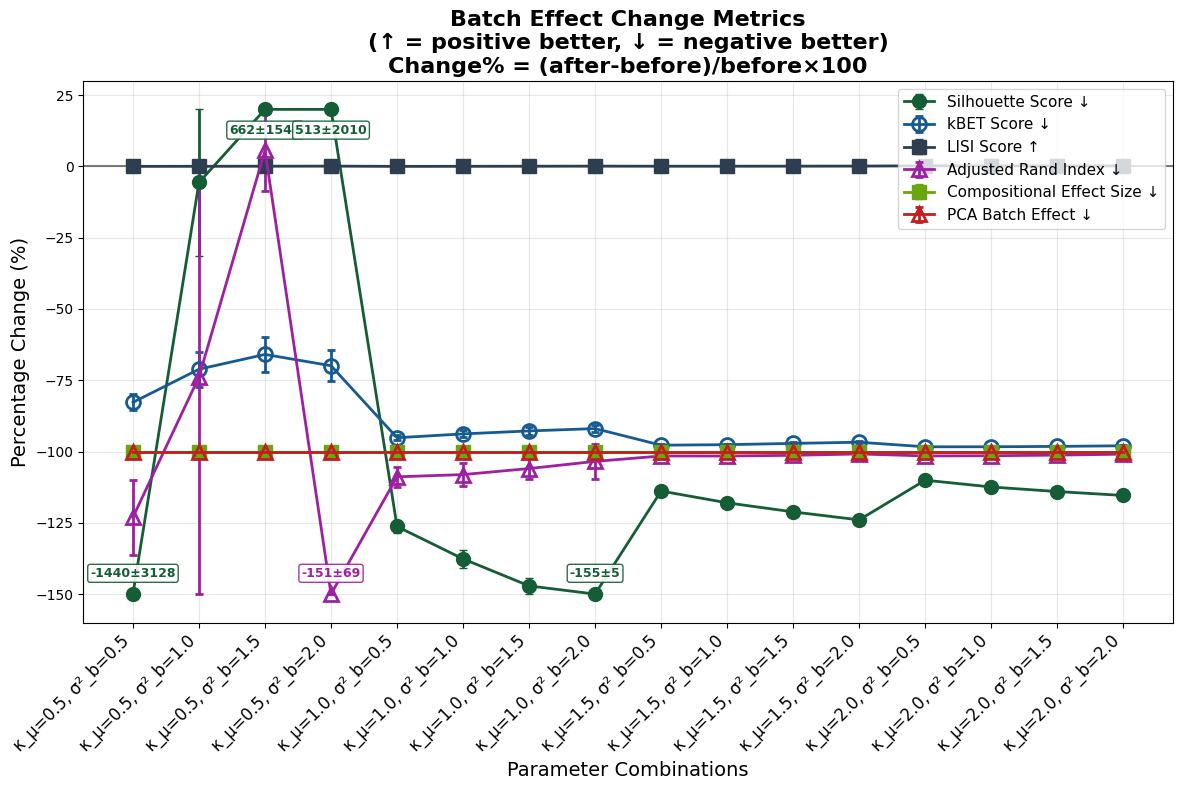

Biological signal preservation plot saved to: results/simplified_mode/2_bio_signal_preservation.png


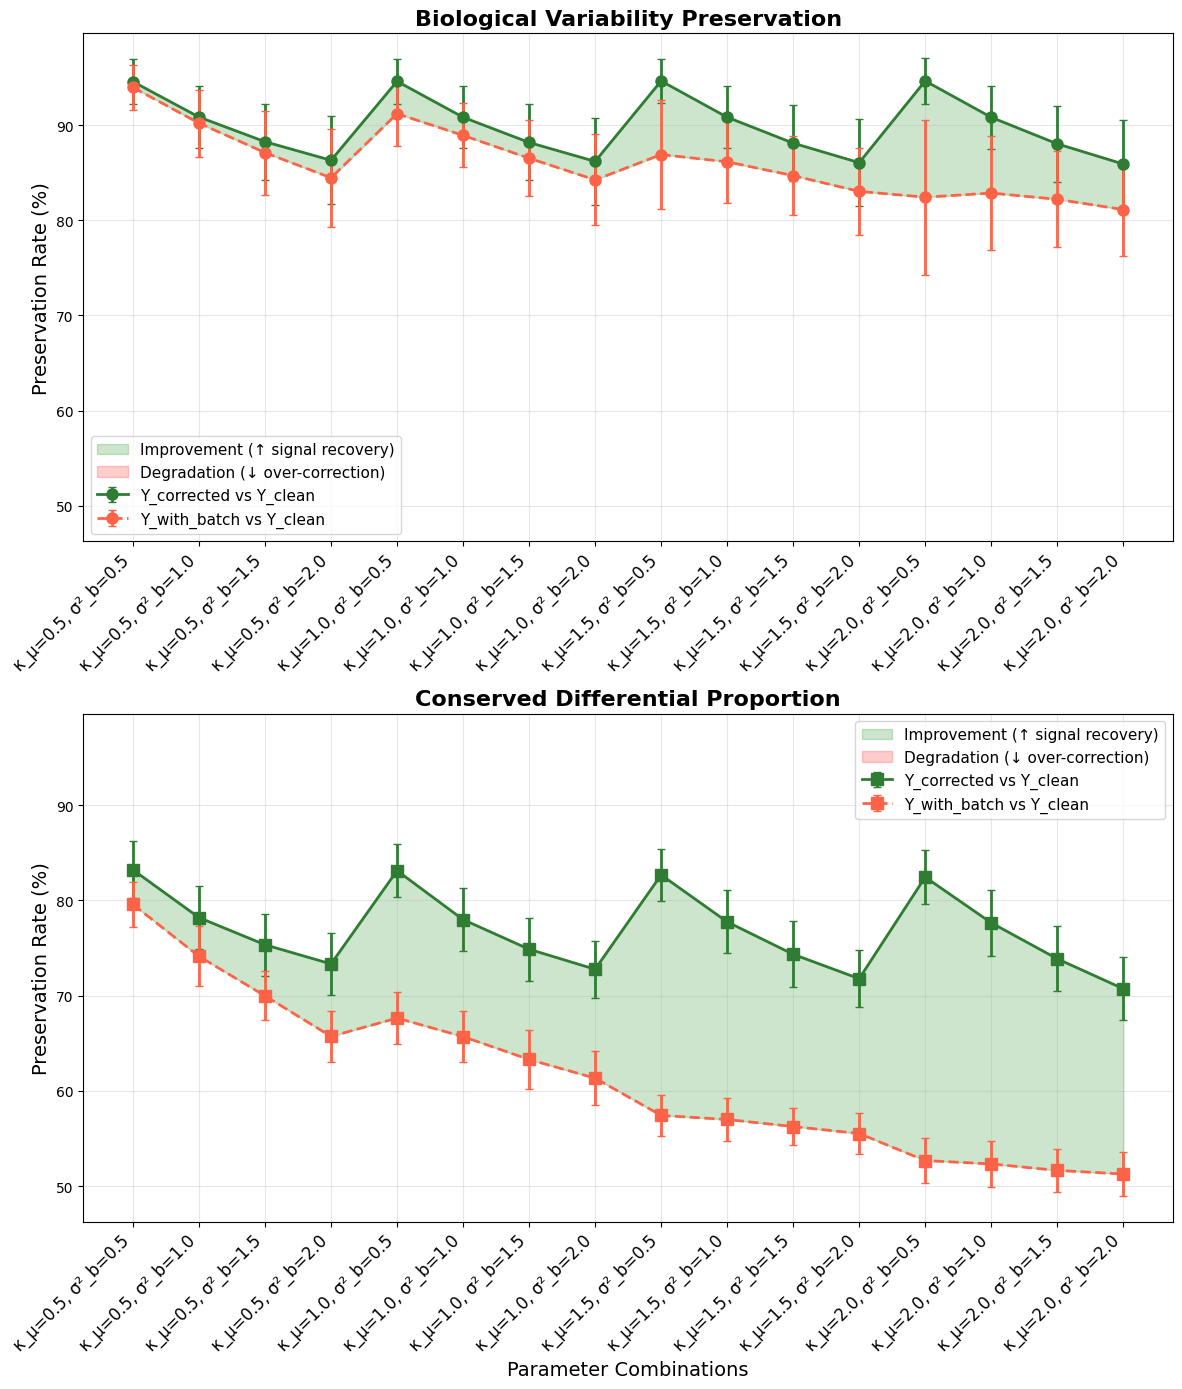

Differential expression TP/FP rates plot saved to: results/simplified_mode/3_differential_expression_tp_fp_rates.png


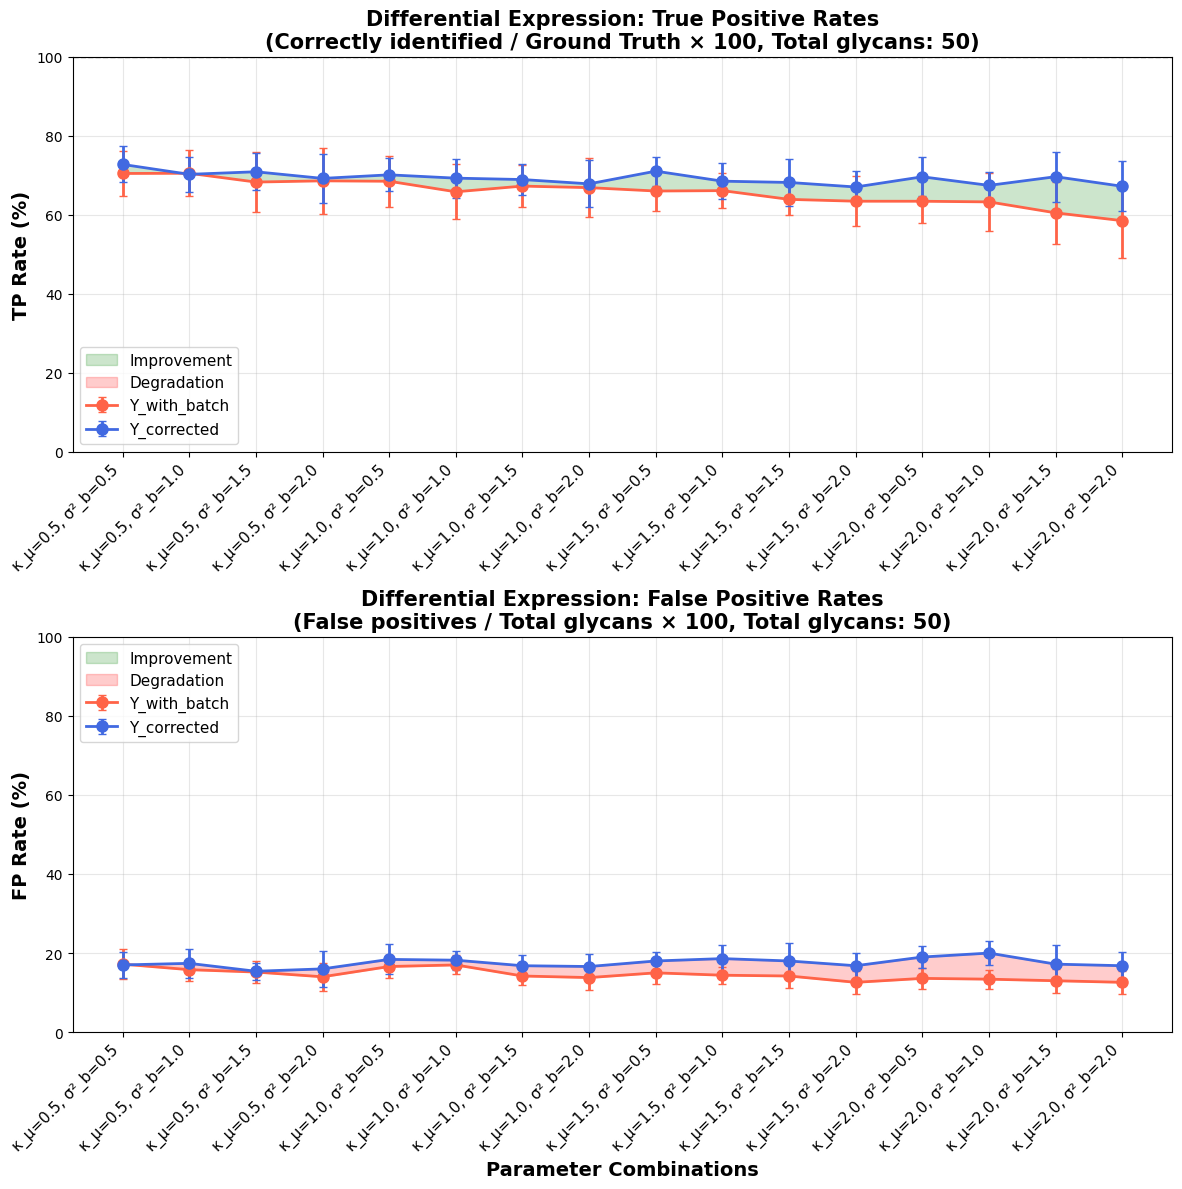

F1_score plot saved to: results/simplified_mode/4_f1_score.png


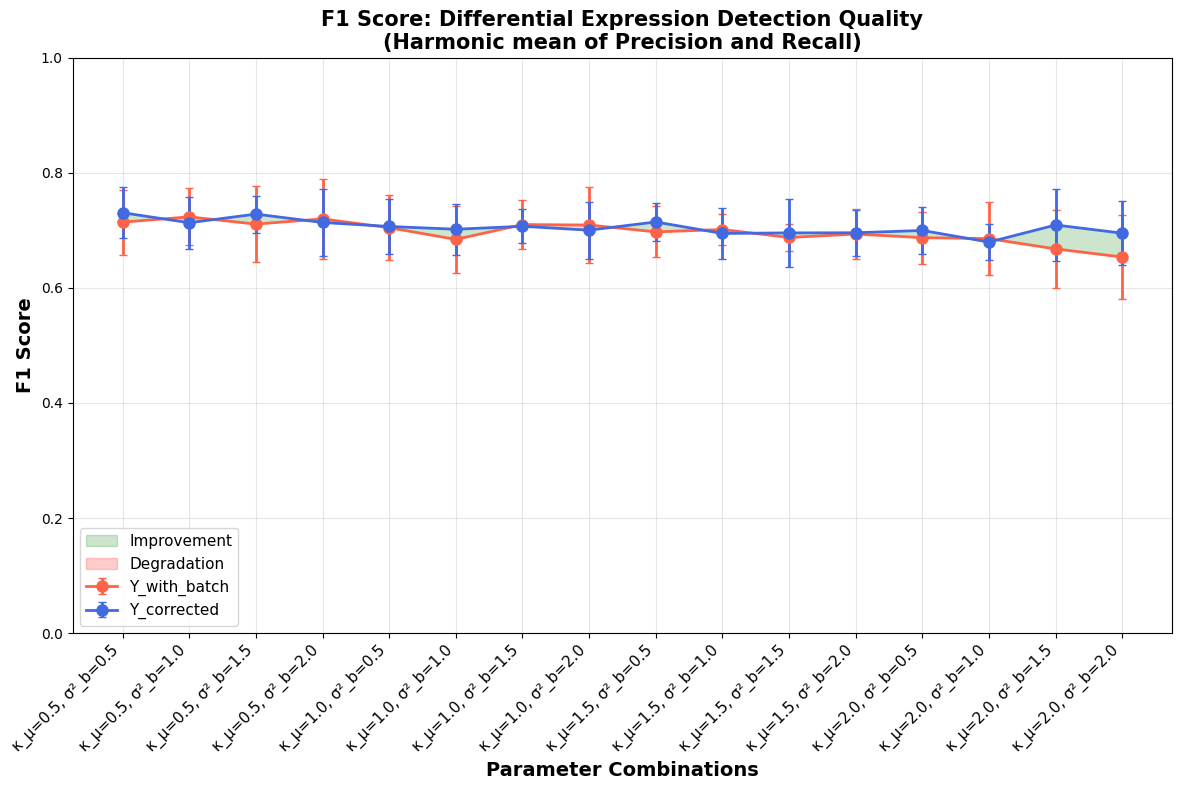

Precision plot saved to: results/simplified_mode/5_precision.png


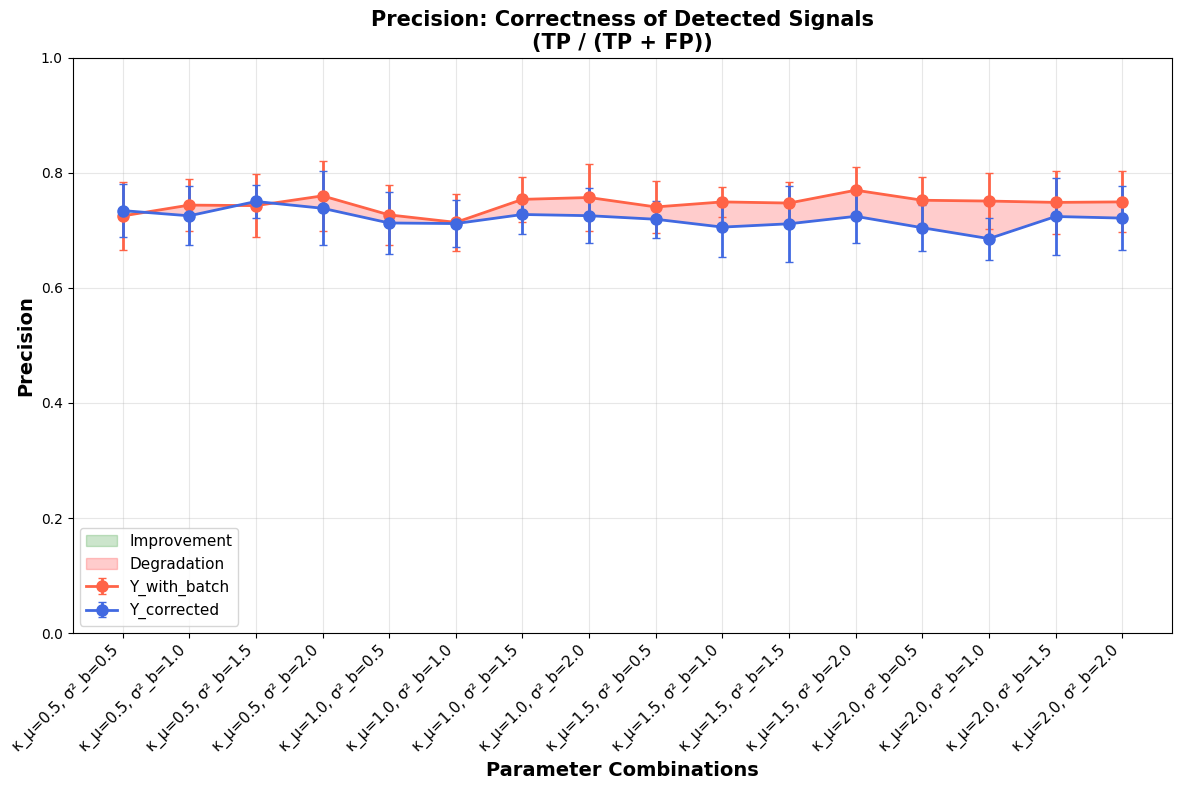

Recall plot saved to: results/simplified_mode/6_recall.png


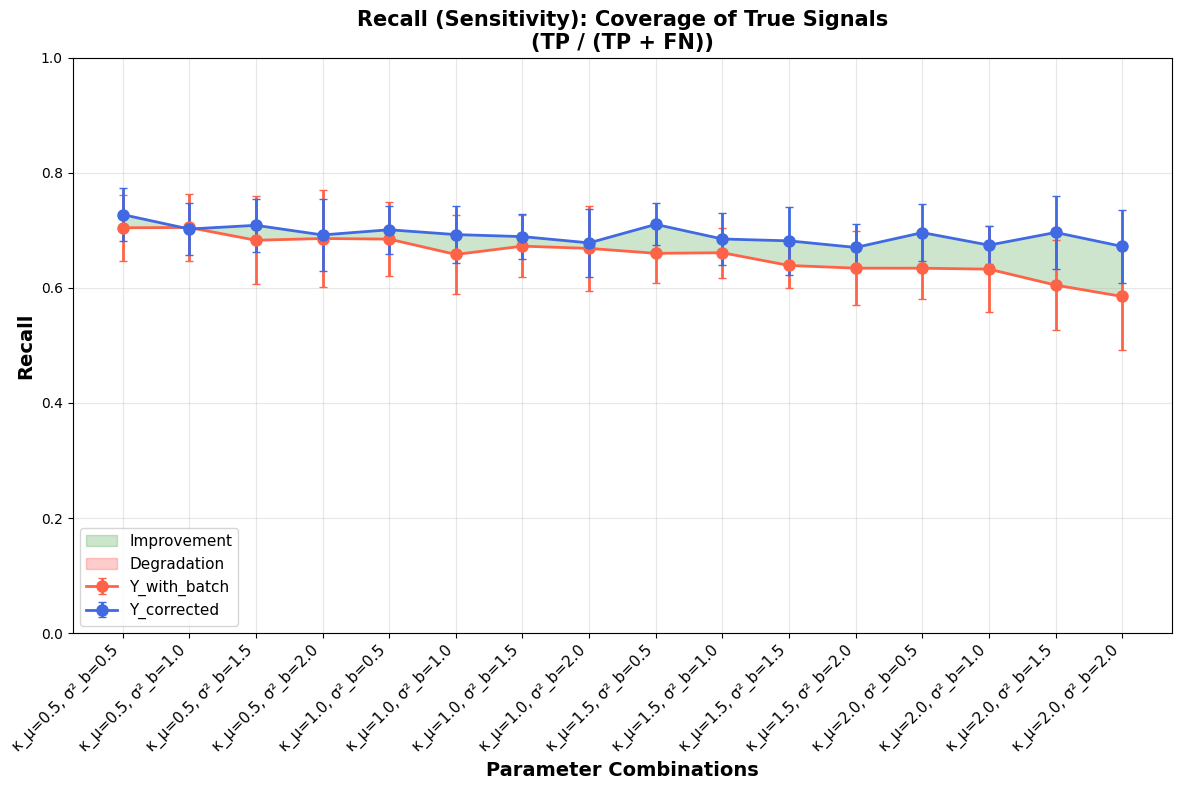

Created 6 plots: ['change_metrics', 'bio_signal_preservation', 'differential_expression_tp_fp_rates', 'f1_score', 'precision', 'recall']


['change_metrics',
 'bio_signal_preservation',
 'differential_expression_tp_fp_rates',
 'f1_score',
 'precision',
 'recall']

In [3]:

from visualization import ParameterGridPlotter

output_dir = config.get('output_dir')
save_path = os.path.join(output_dir, '') if output_dir else None

plotter = ParameterGridPlotter(results_dir=output_dir)
plotter.plot_all(save_path)


# Example 2: ComBat correction based on hybrid-simulated data

Steps:

1. Load real-world glycomics data (CSV)
2. Estimate biological effect sizes from real data (Robust CLR-space processing)
3. Generate clean simulated data preserving real biological signal
4. Apply batch effects
5. Apply ComBat batch correction

Run batch correction pipeline across different parameter combinations to evaluate:
1. Batch effect correction effectiveness 
2. Biological signal preservation 
3. Differential expression recovery 

Parameter grid: Defined in `sample_config/hybrid_mode_config.yaml`

In [7]:
import os
import sys
import yaml

project_root = '../..'
if project_root not in sys.path:
    sys.path.append(project_root)

from use_cases.batch_correction.correction import run_correction

# Auto-detect config path: try installed package first, fallback to local repo
try:
    import glycoforge
    config_dir = os.path.join(os.path.dirname(glycoforge.__file__), 'sample_config')
    print(f"✓ Using config from installed package")
except (ImportError, FileNotFoundError):
    # Fallback: assume running from repo root (../../sample_config)
    config_dir = os.path.join(project_root, 'sample_config')
    print(f"✓ Using config from local repository")

config_path = os.path.join(config_dir, 'hybrid_mode_config.yaml')

with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

# Note: No need to resolve data_file path anymore
# load_data_from_glycowork() handles both local files and glycowork built-in datasets automatically

print("Configuration loaded from:", config_path)
print(f"Output directory: {config.get('output_dir')}")
print(f"Seeds to run: {config.get('random_seeds')}")
print(f"Data source: {config.get('data_source')}")
print(f"Data file: {config.get('data_file')}")

✓ Using config from installed package
Configuration loaded from: /proj/naiss2024-5-630/users/x_siyhu/GlycoForge/use_cases/batch_correction/../../glycoforge/sample_config/hybrid_mode_config.yaml
Output directory: results/hybrid_mode_batch_O
Seeds to run: [42, 123, 2024, 7, 99, 56, 88, 314, 271, 1618]
Data source: real
Data file: glycomics_human_leukemia_O_PMID34646384.csv


In [ ]:
# ~7mins for 10 seeds * 16 parameter combinations 
results = run_correction(config)

print("\nPipeline completed!")
print(f"Total results: {len(results)}")


In [ ]:
from visualization import ParameterGridPlotter

output_dir = config.get('output_dir')
save_path = os.path.join(output_dir, '') if output_dir else None

plotter = ParameterGridPlotter(results_dir=output_dir)
plotter.plot_all(save_path)

# Example 3 ： Plot Single Run Metrics

In [ ]:
from visualization import SingleRunPlotter
# Example directories:
# - "results/simplified_mode/kappa_mu_2.0_var_b_0.5"
single_run_dir = "results/simplified_mode/kappa_mu_2.0_var_b_0.5"

# Create plotter and generate visualization
plotter = SingleRunPlotter(single_run_dir, verbose=True)
plotter.plot_single_run_metrics(save_path=f"{single_run_dir}/single_run_summary.png")